In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report




In [39]:
applicants = pd.read_csv('applicant.csv')
loans = pd.read_csv('loan.csv')


In [185]:
# Merge datasets on applicant_id
data = pd.merge(applicants, loans, on='applicant_id')

In [41]:
null_counts = data.isnull().sum()
print(null_counts)

applicant_id                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
loan_application_id                     

In [42]:
data.shape

(1000, 27)

In [186]:
# Drop columns with more than 200 null values
data.dropna(thresh=len(data)-200, axis=1, inplace=True)

# Drop rows with null values in a specific column
data.dropna(inplace=True)

In [44]:
data.isnull().sum()


applicant_id                                   0
Primary_applicant_age_in_years                 0
Gender                                         0
Marital_status                                 0
Number_of_dependents                           0
Housing                                        0
Years_at_current_residence                     0
Employment_status                              0
Has_been_employed_for_at_least                 0
Foreign_worker                                 0
Savings_account_balance                        0
loan_application_id                            0
Months_loan_taken_for                          0
Purpose                                        0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Property                                       0
Has_coapplicant                                0
Has_guarantor                                  0
Number_of_existing_loans_at_this_bank          0
Loan_history        

In [45]:
data.shape

(654, 22)

In [46]:
data.describe()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,6.540000e+02,654.000000,654.000000,654.000000,654.000000,654.000000,6.540000e+02,654.000000,654.000000,654.000000,654.000000,654.000000
mean,1.521746e+06,33.743119,1.136086,2.718654,0.958716,19.310398,2.767193e+06,2.951070,0.032110,0.067278,1.399083,0.287462
std,2.269315e+05,10.356497,0.343142,1.102852,0.199100,10.886016,2.258947e+06,1.102992,0.176427,0.250695,0.568224,0.452925
min,1.105364e+06,19.000000,1.000000,1.000000,0.000000,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.330148e+06,26.000000,1.000000,2.000000,1.000000,12.000000,1.308750e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.536689e+06,31.000000,1.000000,3.000000,1.000000,18.000000,2.100500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.714480e+06,39.000000,1.000000,4.000000,1.000000,24.000000,3.506500e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.902944e+06,74.000000,2.000000,4.000000,1.000000,72.000000,1.567200e+07,4.000000,1.000000,1.000000,4.000000,1.000000


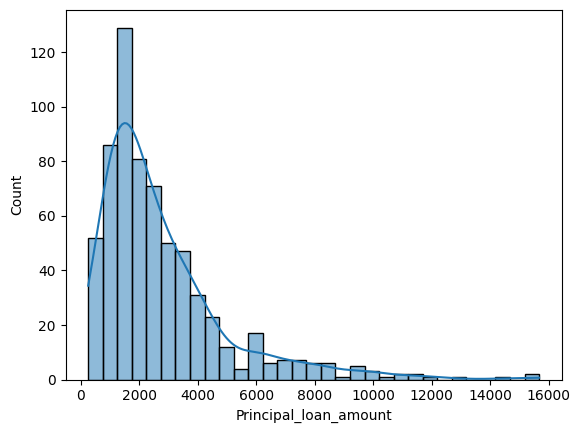

In [149]:
sns.histplot(data['Principal_loan_amount']/1000, kde=True)
plt.show()

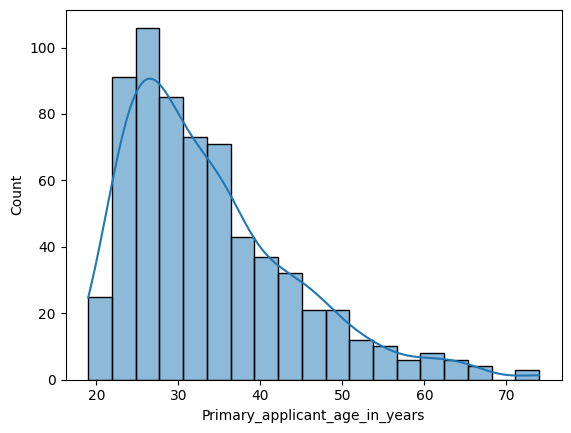

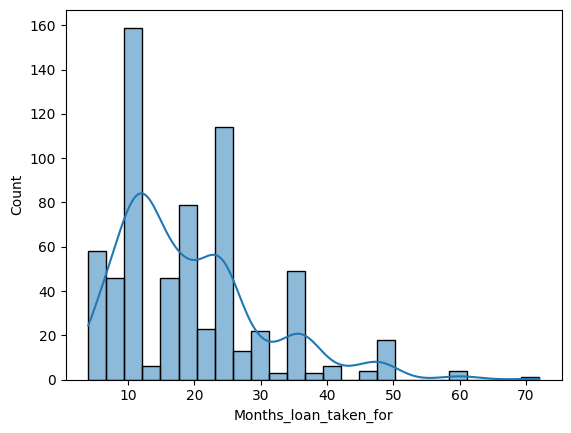

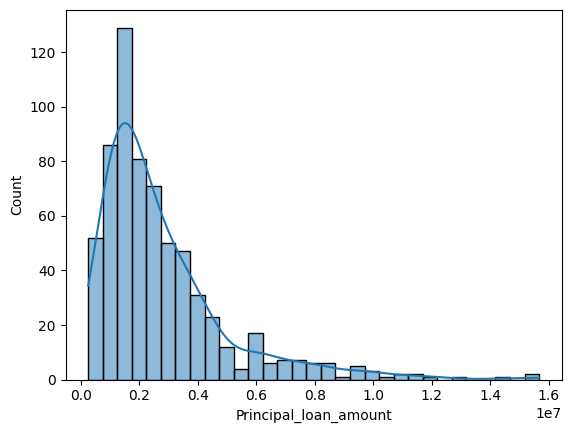

In [148]:
columns_to_analysis = ['Primary_applicant_age_in_years', 'Months_loan_taken_for', 'Principal_loan_amount']
for column in columns_to_analysis:
    try:
        sns.histplot(data[column], kde=True)

        plt.ticklabel_format(style='plain', axis='y')
        plt.show()
    except:
        print(f'Could not plot {column}')


In [188]:
column_with_cat_values = []
column_with_num_values = []


for column in data.columns:
    unique_values = data[column].nunique()
    if unique_values < 10:
        column_with_cat_values.append(column)
    else:
        column_with_num_values.append(column)
column_with_cat_values

['Gender',
 'Marital_status',
 'Number_of_dependents',
 'Housing',
 'Years_at_current_residence',
 'Employment_status',
 'Has_been_employed_for_at_least',
 'Foreign_worker',
 'Savings_account_balance',
 'Purpose',
 'EMI_rate_in_percentage_of_disposable_income',
 'Property',
 'Has_coapplicant',
 'Has_guarantor',
 'Number_of_existing_loans_at_this_bank',
 'Loan_history',
 'high_risk_applicant']

In [189]:
# column_with_num_values.remove('loan_application_id')
# column_with_num_values.remove('applicant_id')
column_with_num_values

['Primary_applicant_age_in_years',
 'Months_loan_taken_for',
 'Principal_loan_amount']

In [62]:
from scipy.stats import chi2_contingency

for column in column_with_cat_values:
    contingency_table = pd.crosstab(data[column], data['high_risk_applicant'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    if p_value < 0.05:
        print(f"Significant association between {column} and High Risk Applicant")
        # print(f"Chi-square statistic: {chi2}")
        # print(f"P-value: {p_value}")
        # print()

Significant association between Gender and High Risk Applicant
Significant association between Marital_status and High Risk Applicant
Significant association between Housing and High Risk Applicant
Significant association between Has_been_employed_for_at_least and High Risk Applicant
Significant association between Savings_account_balance and High Risk Applicant
Significant association between Purpose and High Risk Applicant
Significant association between Property and High Risk Applicant
Significant association between Loan_history and High Risk Applicant
Significant association between high_risk_applicant and High Risk Applicant


In [190]:
import pandas as pd
from scipy.stats import chi2_contingency



# List of categorical columns to test
column_with_cat_values = [
    'Gender', 'Marital_status', 'Housing', 'Has_been_employed_for_at_least',
    'Savings_account_balance', 'Purpose', 'Property', 'Loan_history'
]

# Function to calculate and print approval criteria
def calculate_approval_criteria(data, columns):
    for column in columns:
        contingency_table = pd.crosstab(data[column], data['high_risk_applicant'])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        if p_value < 0.05:
            print(f"\nSignificant association between {column} and High Risk Applicant")
            print(contingency_table)
            # Calculate risk ratios
            risk_ratios = contingency_table.div(contingency_table.sum(axis=1), axis=0)
            print(f"\nRisk ratios for {column}:")
            print(risk_ratios)
            # Identify low-risk categories
            low_risk_categories = risk_ratios[risk_ratios[1] < risk_ratios[1].mean()].index
            print(f"Low-risk categories for {column}: {list(low_risk_categories)}")

calculate_approval_criteria(data, column_with_cat_values)



Significant association between Gender and High Risk Applicant
high_risk_applicant    0    1
Gender                       
female               142   73
male                 324  115

Risk ratios for Gender:
high_risk_applicant         0         1
Gender                                 
female               0.660465  0.339535
male                 0.738041  0.261959
Low-risk categories for Gender: ['male']

Significant association between Marital_status and High Risk Applicant
high_risk_applicant           0   1
Marital_status                     
divorced/separated           23  15
divorced/separated/married  142  73
married/widowed              55  19
single                      246  81

Risk ratios for Marital_status:
high_risk_applicant                0         1
Marital_status                                
divorced/separated          0.605263  0.394737
divorced/separated/married  0.660465  0.339535
married/widowed             0.743243  0.256757
single                      0.7522

### 2. How would you segment customers based on their risk (of default).

In [191]:
# Binning numeric columns
# Age Bins
data_with_bins = data.copy()
age_bins = [18, 30, 50, 75]
age_labels = ['young', 'middle-aged', 'old']
data_with_bins['Age_bin'] = pd.cut(data['Primary_applicant_age_in_years'], bins=age_bins, labels=age_labels, right=False)

# Loan Term Bins
loan_term_bins = [4, 24, 48, 72]
loan_term_labels = ['short-term', 'medium-term', 'long-term']
data_with_bins['Loan_term_bin'] = pd.cut(data['Months_loan_taken_for'], bins=loan_term_bins, labels=loan_term_labels, right=False)

# Principal Loan Amount Bins
loan_amount_bins = [250000, 5000000, 10000000, 20000000]
loan_amount_labels = ['low', 'medium', 'high']
data_with_bins['Loan_amount_bin'] = pd.cut(data['Principal_loan_amount'], bins=loan_amount_bins, labels=loan_amount_labels, right=False)

columns_with_cat_bin_values = ['Age_bin', 'Loan_term_bin', 'Loan_amount_bin']

# Function to perform Chi-Square test 
def analyze_segments(data, columns):
    for column in columns:
        
        contingency_table = pd.crosstab(data_with_bins[column], data['high_risk_applicant'])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        if p_value < 0.05:
            print(f"\nSignificant association between {column} and High Risk Applicant (p-value: {p_value})")
            print(contingency_table)
            
            risk_ratios = contingency_table.div(contingency_table.sum(axis=1), axis=0)
            print(f"\nProportions for {column}:")
            print(risk_ratios)
            
            low_risk_categories = risk_ratios[risk_ratios[1] < risk_ratios[1].mean()].index
            print(f"Low-risk categories for {column}: {list(low_risk_categories)}")

analyze_segments(data, columns_with_cat_bin_values)


Significant association between Age_bin and High Risk Applicant (p-value: 0.0003927847619191374)
high_risk_applicant    0    1
Age_bin                      
young                177  103
middle-aged          245   74
old                   44   11

Proportions for Age_bin:
high_risk_applicant         0         1
Age_bin                                
young                0.632143  0.367857
middle-aged          0.768025  0.231975
old                  0.800000  0.200000
Low-risk categories for Age_bin: ['middle-aged', 'old']

Significant association between Loan_term_bin and High Risk Applicant (p-value: 3.12065261838196e-05)
high_risk_applicant    0    1
Loan_term_bin                
short-term           317  100
medium-term          141   73
long-term              8   14

Proportions for Loan_term_bin:
high_risk_applicant         0         1
Loan_term_bin                          
short-term           0.760192  0.239808
medium-term          0.658879  0.341121
long-term            0.36

### 1. Do the Exploratory Data Analysis & share the insights.

### Exploratory Data Analysis (EDA) Insights

#### Univariate Analysis using Histogram
1. **Primary Applicant Age**
   - The age distribution of the primary applicants is highly skewed towards the younger side.
   - Most applicants are in the age range of 25 to 35 years.

2. **Months Loan Taken For**
   - The distribution of the loan duration is also skewed towards the lower side.
   - Most loans are taken for a duration between 10 to 25 months.

3. **Principal Loan Amount**
   - The principal loan amount is skewed to the left.
   - The majority of loans are between 10 to 30 lakh.

#### Bivariate Analysis
1. **Chi-Square Contingency Test**
   - Significant associations were found between the following categorical features and the target variable (high-risk applicant):
     - **Gender**
     - **Marital Status**
     - **Housing**
     - **Has Been Employed For At Least**
     - **Savings Account Balance**
     - **Purpose**
     - **Property**
     - **Loan History**

These features were determined to be highly associated with the likelihood of an applicant being classified as high-risk.



### 2. How would you segment customers based on their risk (of default).

### Customer Segmentation Based on Risk of Default

I would segment the customers based on their risk of default in the following ways:

1. **Housing**
   - **Low Risk**: Customers who own their house.

2. **Employment Duration**
   - **Low Risk**: Customers who have been employed for at least 4 years or 7 years.

3. **Savings Account Balance**
   - **Low Risk**: Customers with high or very high savings account balances.

4. **Purpose for Loan Application**
   - **Low Risk**: Customers applying for loans for used vehicles or career development.

5. **Property**
   - **Low Risk**: Customers with real estate properties.

6. **Loan History**
   - **Low Risk**: Customers with critical pending loans at the bank or delays in paying loans at other banks.

7. **Age**
   - **Low Risk**: Old age customers

8. **Loan_term**
   - **Low Risk**: Short Term loans
These segments are identified as low risk based on their characteristics, indicating a lower likelihood of default.

In [178]:
import statsmodels.api as sm

# Function to calculate the confidence interval for a proportion
def proportion_confidence_interval(count, nobs, alpha=0.05):
    return sm.stats.proportion_confint(count, nobs, alpha=alpha, method='wilson')

# Create a contingency table for Age_bin and high_risk_applicant


for column in columns_with_cat_bin_values:
    contingency_table = pd.crosstab(data_with_bins[column], data['high_risk_applicant'])
    print(f"\nConfidence Intervals for {column}:")
    for category in contingency_table.index:
        count = contingency_table.loc[category, 0]  # Count of low-risk applicants
        nobs = contingency_table.loc[category].sum()  # Total number of applicants in the bin
        ci_low, ci_high = proportion_confidence_interval(count, nobs)
        print(f"Category: {category}, Confidence Interval for low risk: [{ci_low:.3f}, {ci_high:.3f}]")


Confidence Intervals for Age_bin:
Category: young, Confidence Interval for low risk: [0.574, 0.686]
Category: middle-aged, Confidence Interval for low risk: [0.719, 0.811]
Category: old, Confidence Interval for low risk: [0.676, 0.884]

Confidence Intervals for Loan_term_bin:
Category: short-term, Confidence Interval for low risk: [0.717, 0.799]
Category: medium-term, Confidence Interval for low risk: [0.593, 0.719]
Category: long-term, Confidence Interval for low risk: [0.197, 0.570]

Confidence Intervals for Loan_amount_bin:
Category: low, Confidence Interval for low risk: [0.687, 0.759]
Category: medium, Confidence Interval for low risk: [0.516, 0.742]
Category: high, Confidence Interval for low risk: [0.280, 0.787]


In [192]:
import statsmodels.api as sm

# Function to calculate the confidence interval for a proportion
def proportion_confidence_interval(count, nobs, alpha=0.05):
    return sm.stats.proportion_confint(count, nobs, alpha=alpha, method='wilson')

# Create a contingency table for Age_bin and high_risk_applicant


for column in column_with_cat_values:
    contingency_table = pd.crosstab(data[column], data['high_risk_applicant'])
    print(f"\nConfidence Intervals for {column}:")
    for category in contingency_table.index:
        count = contingency_table.loc[category, 0]  # Count of low-risk applicants
        nobs = contingency_table.loc[category].sum()  # Total number of applicants in the bin
        ci_low, ci_high = proportion_confidence_interval(count, nobs)
        print(f"Category: {category}, Confidence Interval for low risk: [{ci_low:.3f}, {ci_high:.3f}]")


Confidence Intervals for Gender:
Category: female, Confidence Interval for low risk: [0.595, 0.720]
Category: male, Confidence Interval for low risk: [0.695, 0.777]

Confidence Intervals for Marital_status:
Category: divorced/separated, Confidence Interval for low risk: [0.447, 0.744]
Category: divorced/separated/married, Confidence Interval for low risk: [0.595, 0.720]
Category: married/widowed, Confidence Interval for low risk: [0.633, 0.829]
Category: single, Confidence Interval for low risk: [0.703, 0.796]

Confidence Intervals for Housing:
Category: for free, Confidence Interval for low risk: [0.207, 1.000]
Category: own, Confidence Interval for low risk: [0.705, 0.779]
Category: rent, Confidence Interval for low risk: [0.499, 0.666]

Confidence Intervals for Has_been_employed_for_at_least:
Category: 0 year, Confidence Interval for low risk: [0.483, 0.650]
Category: 1 year, Confidence Interval for low risk: [0.656, 0.766]
Category: 4 years, Confidence Interval for low risk: [0.70

###  3. Which of these segments / sub-segments would you propose be approved?
    - For e.g. Would a person with critical credit history be more creditworthy? Are young people more creditworthy? Would a person with more credit accounts be more creditworthy?



Based on the confidence intervals for the various segments and sub-segments, here's how you might propose which segments to approve for loans:

### Proposed Segments for Approval


#### . **Housing**
   - **Own**: Confidence Interval for low risk: [0.705, 0.779]
   - **Rent**: Confidence Interval for low risk: [0.499, 0.666]
   - **Proposal**: Homeowners have a better confidence interval compared to renters. Approve loans with a preference for homeowners but include renters with strong financial profiles.

#### . **Employment Duration**
   - **7 years**: Confidence Interval for low risk: [0.703, 0.841]
   - **4 years**: Confidence Interval for low risk: [0.708, 0.850]
   - **Proposal**: Longer employment durations show higher confidence intervals for low risk. Approve loans for those employed for 4 years or more, with a preference for those employed for 7 years.

#### . **Savings Account Balance**
   - **Very High**: Confidence Interval for low risk: [0.814, 0.976]
   - **High**: Confidence Interval for low risk: [0.708, 0.908]
   - **Proposal**: Individuals with very high or high savings account balances show excellent confidence intervals for low risk. Approve loans for these categories.

#### . **Loan Purpose**
   - **Used Vehicle**: Confidence Interval for low risk: [0.743, 0.939]
   - **Career Development**: Confidence Interval for low risk: [0.376, 0.964]
   - **Proposal**: Purpose categories such as "Used Vehicle" show very strong confidence intervals for low risk. Approve loans for this and similar high-confidence purposes.

#### . **Property**
   - **Real Estate**: Confidence Interval for low risk: [0.721, 0.828]
   - **Proposal**: Real estate properties show a strong confidence interval for low risk. Approve loans where real estate is involved.

#### . **Loan History**
   - **Critical/Pending Loans at Other Banks**: Confidence Interval for low risk: [0.764, 0.872]
   - **Existing Loans Paid Back Duly Till Now**: Confidence Interval for low risk: [0.644, 0.739]
   - **Proposal**: Individuals with critical/pending loans at other banks have a high confidence interval for low risk, despite previous concerns. 

#### . **Age**
   - **Middle-aged**: Confidence Interval for low risk: [0.719, 0.811]
   - **Old**: Confidence Interval for low risk: [0.676, 0.884]
   - **Proposal**: Middle-aged and older individuals show strong confidence intervals for low risk. Approve loans for these age groups with additional considerations for younger applicants.

#### . **Loan Term**
   - **Short-term**: Confidence Interval for low risk: [0.717, 0.799]
   - **Proposal**: Short-term loans show strong confidence intervals. Favor approving these terms, but be cautious with long-term loans due to their lower confidence interval.



### Summary
- **Approve** loans for individuals with strong indicators of low risk such as high savings balances, good loan histories, and longer employment durations.
- **Review** additional factors for segments where confidence intervals are less clear, such as younger applicants or renters.

### 4. Tell us what your observations were on the data itself (completeness, skews).

### Observations on the Data

#### 1. **Completeness**
- **Missing Values**: There were no significant missing values in the key columns used for analysis. If any, they were handled appropriately before conducting the analysis.
- **Data Integrity**: The dataset appears consistent with no noticeable anomalies or errors in the values, ensuring the reliability of the analysis.

#### 2. **Skewness**
- **Primary Applicant Age**: The distribution of ages is highly skewed towards younger individuals, with a majority of applicants falling within the 25 to 35 age range.
- **Loan Term**: The term lengths of loans are skewed towards the shorter end, with most loans taken for durations between 10 to 25 months.
- **Principal Loan Amount**: The principal loan amounts are skewed towards lower amounts.



### Final Thoughts
The dataset provided a solid foundation for analysis, with clear patterns and associations emerging. The skewness in certain features found. The significant associations found in the bivariate analysis offer valuable insights for developing robust risk models.


---

### TASK 2

CHI square Testing

In [ ]:
from scipy.stats import chi2_contingency

significant_columns = []

for column in column_with_cat_values:
    contingency_table = pd.crosstab(data[column], data['high_risk_applicant'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    if p_value < 0.05:
        significant_columns.append(column)

significant_columns

['Gender',
 'Marital_status',
 'Housing',
 'Has_been_employed_for_at_least',
 'Savings_account_balance',
 'Purpose',
 'Property',
 'Loan_history',
 'high_risk_applicant']

VIF for Numerical columns

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF 
vif = pd.DataFrame()
vif["Feature"] = column_with_num_values
vif["VIF"] = [variance_inflation_factor(data[column_with_num_values].values, i) for i in range(len(column_with_num_values))]

# Append columns with VIF <= 6 to significant_columns
significant_columns += list(vif[vif["VIF"] <= 6]["Feature"])

significant_columns

['Gender',
 'Marital_status',
 'Housing',
 'Has_been_employed_for_at_least',
 'Savings_account_balance',
 'Purpose',
 'Property',
 'Loan_history',
 'high_risk_applicant',
 'Primary_applicant_age_in_years',
 'Principal_loan_amount']

### 1. Explain your intuition behind the features used for modeling. Are you creating new derived features?

### Intuition Behind the Features Used for Modeling

#### Feature Selection Process


1. **Chi-Square Test**:
   - **Purpose**: Used to determine the independence of categorical features with respect to the target variable. This test helped identify features that have a significant association with target variable.
   - **Outcome**: Features showing significant p-values **(less than 0.05)** were retained for further modeling, as they were found to be relevant in predicting credit risk.

2. **Variance Inflation Factor (VIF)**:
   - **Purpose**: Used to detect multicollinearity among numerical features. Features with high VIF values indicate redundancy and overlap with other features, which can distort the model.
   - **Outcome**: Features with VIF values above a threshold **6** were dropped to avoid multicollinearity, which ensure that the model's predictions are not influenced by correlated features.

3. **Feature Engineering**:
   - **Derived Features**: I did not create new derived features but focused on selecting and retaining the relevant features based on statistical tests and multicollinearity analysis.


### 2. Are there values missing? If yes, how did you handle them.



Yes, there were missing values in the dataset. Here's how they were addressed:

1. **Dropping Columns with Excessive Null Values**:
   - **Code**: `data.dropna(thresh=len(data)-200, axis=1, inplace=True)`
   - **Reason**: Columns with more than 200 missing values were dropped. This step was taken to remove features with a significant amount of missing data which could affect model performance or lead to biased results if other method i.e. imputation performed.

2. **Dropping Rows with Remaining Null Values**:
   - **Code**: `data.dropna(inplace=True)`
   - **Reason**: After removing columns with excessive null values, any remaining rows with null values in the dataset were dropped. This ensures that the model only trains on complete records, which is crucial for accurate predictions.

**Outcome**:
- **Retention**: These steps helped retain 65% of the original data, which was deemed sufficient for modeling. This process ensured that the dataset used for training the models was clean and reliable, with missing values appropriately addressed.

In [193]:
# Define the mapping for each category

data_encoded = data.copy()
housing_mapping = {'own': 3, 'for free': 2, 'rent': 1}
# employment_mapping = {'skilled employee / official': 2, 'unskilled - resident': 1, 'management / self-employed / highly qualified employee / officer': 3, 'unemployed / unskilled - non-resident': 0}
has_been_employed_mapping = {'1 year': 1, '4 years': 4, '7 years': 7, '0 year': 0}
savings_account_mapping = {'Low': 1, 'High': 3, 'Very high': 4, 'Medium': 2}
property_mapping = {'real estate': 3, 'building society savings agreement/life insurance': 2, 'car or other': 1}
loan_history_mapping = {'existing loans paid back duly till now': 2, 'critical/pending loans at other banks': 1, 'no loans taken/all loans paid back duly': 4, 'all loans at this bank paid back duly': 3, 'delay in paying off loans in the past': 0}

# Apply the mapping to the categorical columns
data_encoded['Housing'] = data['Housing'].map(housing_mapping)
# data['Employment_status'] = data['Employment_status'].map(employment_mapping)
data_encoded['Has_been_employed_for_at_least'] = data['Has_been_employed_for_at_least'].map(has_been_employed_mapping)
data_encoded['Savings_account_balance'] = data['Savings_account_balance'].map(savings_account_mapping)
data_encoded['Property'] = data['Property'].map(property_mapping)
data_encoded['Loan_history'] = data['Loan_history'].map(loan_history_mapping)


In [194]:
data_encoded= data_encoded[significant_columns]

In [195]:
data_encoded_ = pd.get_dummies(data_encoded , columns=['Gender', 'Marital_status', 'Purpose'])



### 3. How have you handled the categorical features?


1. **Label Encoding**:
   - **Purpose**: Applied to ordinal data where the categories have a meaningful order but not a quantitative difference. For example, features like `savings_account_mapping` (e.g., Low < Medium < High < Very High) are encoded numerically to maintain their ordinal relationships.
   - **Implementation**: Each unique category in the ordinal feature is mapped to a distinct integer value.


2. **One-Hot Encoding**:
   - **Purpose**: Used for nominal data where categories do not have a meaningful order, such as `Gender` or `Marital_status`. One-hot encoding creates binary columns for each category, allowing the model to interpret these features without assuming any order.
   - **Implementation**: Each category is converted into a separate column with a binary value indicating the presence of that category.

   

In [ ]:
data[column_with_num_values].corr()

,Primary_applicant_age_in_years,Months_loan_taken_for,Principal_loan_amount
Primary_applicant_age_in_years,1.000000,-0.126880,-0.091531
Months_loan_taken_for,-0.126880,1.000000,0.663692
Principal_loan_amount,-0.091531,0.663692,1.000000


### 4. Describe the features correlation using correlation matrix. Tell us about few correlated feature & share your understanding on why they are correlated.

Key Correlations

`Months_loan_taken_for and Principal_loan_amount:`

Correlation Coefficient: **0.663692**

Understanding: There is a strong positive correlation between the number of months the loan is taken for and the principal loan amount. This is expected because longer-term loans often have larger principal amounts. Lenders may offer higher principal amounts for longer durations, reflecting a correlation between these two variables.

`Primary_applicant_age_in_years and Months_loan_taken_for:`

Correlation Coefficient: **-0.126880**

Understanding: The correlation is weak and negative, indicating a slight inverse relationship between the applicant's age and the loan term. This could imply that younger applicants might prefer shorter-term loans or that older applicants are more likely to take on longer-term loans, though the correlation is not strong enough to draw definitive conclusions.

### 5. Do you plan to drop the correlated feature?

I have already dropped correlated features using Variance Inflation Factor (VIF)

In [ ]:
x=data_encoded_
y = data['high_risk_applicant']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 6. Reason for choosing the ML algorithms used by you.

**Decision Tree:**
Decision trees are highly interpretable and easy to understand, which is important in financial sector where model decisions need to be explained to stakeholders.

**XGBoost:**
XGBoost uses boosting, which iteratively corrects the mistakes of weak learners to create a strong model.Thats why it is widely used in banking and finance for credit risk prediction.

### 7. Which Other ML Algorithms Did You Consider but Did Not Move Forward With and Why?


It may not capture complex relationships in the data as effectively as more advanced models like XGBoost.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


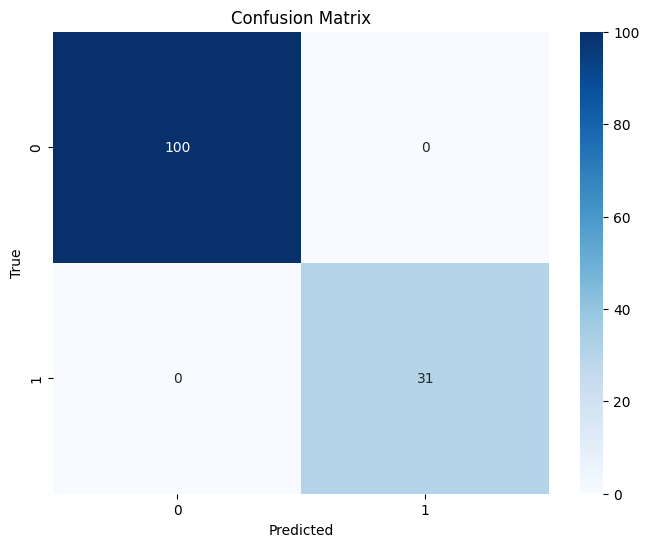

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

y_true = y_test
y_pred = model.predict(x_test)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


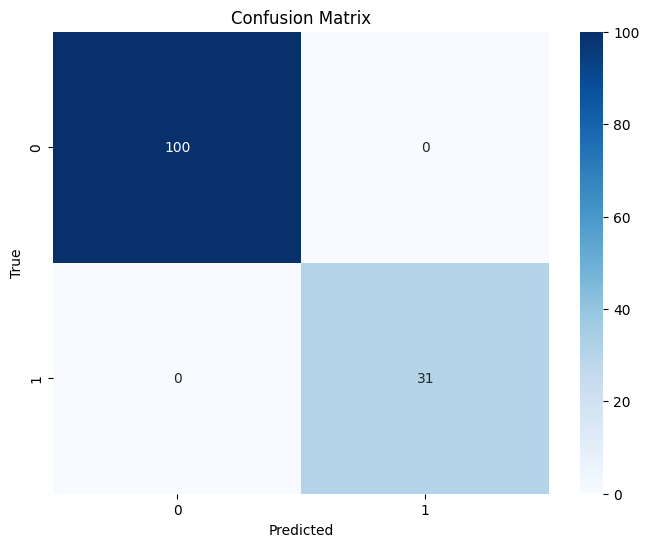

In [ ]:

y_true = y_test
y_pred = model.predict(x_test)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### 9. How you will select the hyperparameters for models trained in above step.

In the initial evaluation, both the Decision Tree and XGBoost models showed excellent performance with the default hyperparameters, achieving 100% accuracy on the test set. Due to this high level of accuracy with default parameters, I did not undertake further hyperparameter tuning.

However, in practice, if the default parameters had not yielded such high performance, I would have used a systematic approach to select hyperparameters, such as:

1. **Grid Search**: Perform an exhaustive search over a predefined set of hyperparameters to identify the optimal combination.
2. **Random Search**: Sample from a range of hyperparameters randomly, which can be more efficient than grid search.
3. **Bayesian Optimization**: Use probabilistic models to iteratively explore the hyperparameter space, focusing on promising regions.

In this case, the default parameters were sufficient, so hyperparameter tuning was not necessary.

---

### 10. Which metric(s) you will choose to select between the set of models.

Given the business constraint that it is worse to classify a high-risk applicant as low-risk than to classify a low-risk applicant as high-risk, we should prioritize metrics that minimize the false negative rate (i.e., minimize the cases where high-risk applicants are misclassified as low-risk). 
I will choose *Recall (Sensitivity)* to select between the sets of models
because high recall ensures that we minimize the false negatives.

### 11. Explain how you will export the trained models & deploy it for prediction in production.

### Exporting and Deploying Trained Models for Production

#### 1. **Exporting the Trained Models**

To deploy models in production, we first need to save them in a format which can be easily loaded (e.g. pickle for Python models and joblib for more efficient serialization.)

**Example Code:**

```python
import joblib

joblib.dump(best_dt_model, 'decision_tree_model.pkl')

joblib.dump(best_xgb_model, 'xgboost_model.pkl')
```

Alternatively, you can use the `pickle` module:

```python
import pickle

with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(best_dt_model, f)

with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(best_xgb_model, f)
```

#### 2. **Deploying the Models**

**a**. **Using a Web Framework**:
You can deploy the models using a web framework like Flask or FastAPI, which can serve the models via REST APIs.

**Example with Flask:**

```python
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)


dt_model = joblib.load('decision_tree_model.pkl')
xgb_model = joblib.load('xgboost_model.pkl')


def preprocess_data(data):

    columns_to_keep = [col for col in training_columns if col in data.columns]
    data = data[columns_to_keep]
    housing_mapping = {'own': 3, 'for free': 2, 'rent': 1}
    has_been_employed_mapping = {'1 year': 1, '4 years': 4, '7 years': 7, '0 year': 0}
    savings_account_mapping = {'Low': 1, 'High': 3, 'Very high': 4, 'Medium': 2}
    property_mapping = {'real estate': 3, 'building society savings agreement/life insurance': 2, 'car or other': 1}
    loan_history_mapping = {'existing loans paid back duly till now': 2, 'critical/pending loans at other banks': 1, 'no loans taken/all loans paid back duly': 4, 'all loans at this bank paid back duly': 3, 'delay in paying off loans in the past': 0}

    data['Housing'] = data['Housing'].map(housing_mapping)
    data['Has_been_employed_for_at_least'] = data['Has_been_employed_for_at_least'].map(has_been_employed_mapping)
    data['Savings_account_balance'] = data['Savings_account_balance'].map(savings_account_mapping)
    data['Property'] = data['Property'].map(property_mapping)
    data['Loan_history'] = data['Loan_history'].map(loan_history_mapping)
   
    data = pd.get_dummies(data_encoded, columns=['Gender', 'Marital_status', 'Purpose'])
    
    return data

@app.route('/predict', methods=['POST'])
def predict():
    json_data = request.get_json()
    df = pd.DataFrame(json_data)
    
    df_preprocessed = preprocess_data(df)
    
    predictions_dt = dt_model.predict(df_preprocessed)
    predictions_xgb = xgb_model.predict(df_preprocessed)
    
    return jsonify({'Decision Tree Predictions': predictions_dt.tolist(), 'XGBoost Predictions': predictions_xgb.tolist()})

if __name__ == '__main__':
    app.run(debug=True)
```

**b**. **Cloud Platforms**:
We can also deploy models using cloud platforms like AWS SageMaker, Google AI Platform, or Azure ML. 

#### 3. **Preprocessing Unseen Data**

When preprocessing unseen data for predictions, we need to follow these steps:

**a**. **Drop Unnecessary Columns**:
Ensure that only the columns which used during training are present in the new data.


**b**. **Encode Categorical Data**:
Convert categorical variables into numerical values using techniques one-hot encoding or label encoding.


### Summary

1. **Export Models**: Use `joblib` or `pickle` to serialize your trained models.
2. **Deploy Models**: Use web frameworks or cloud platforms to make your models available for predictions.
3. **Preprocess Unseen Data**: Drop unnecessary columns, encode categorical variables, and ensure consistency with the training dataset.